# Titanic Project Problem Statement

Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pickle
import warnings
warnings.filterwarnings("ignore")

In [51]:
df= pd.read_csv("Titanic Project.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
df.shape

(891, 12)

In [54]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
(df == 0).sum(axis=0)

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Cabin            0
Embarked         0
dtype: int64

In [58]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

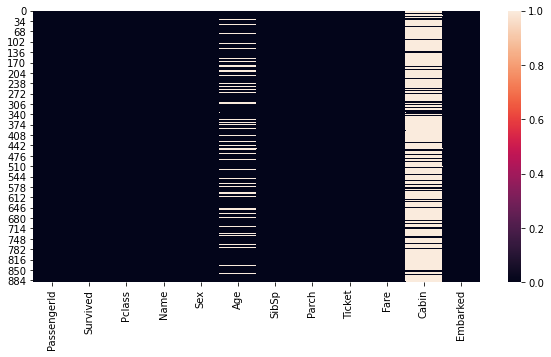

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

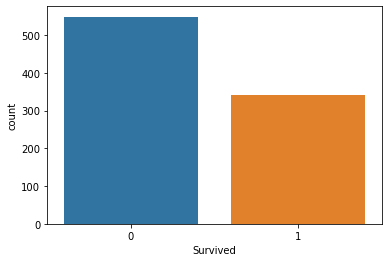

In [60]:
sns.countplot(x="Survived", data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

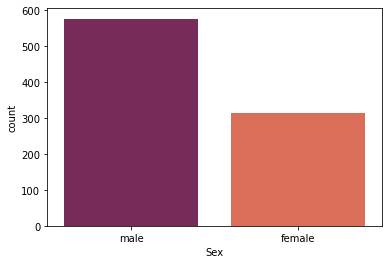

In [61]:
sns.countplot(x="Sex", data=df, palette='rocket')

<AxesSubplot:xlabel='Survived', ylabel='count'>

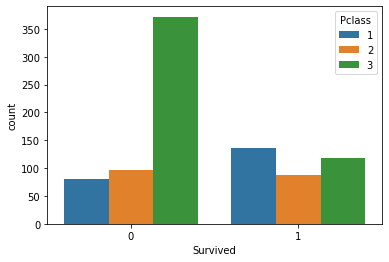

In [62]:
sns.countplot(x="Survived", hue='Pclass', data=df)

<AxesSubplot:>

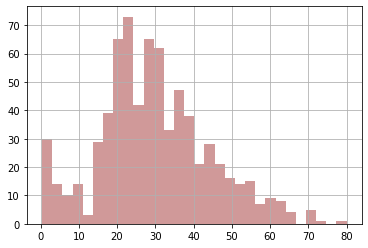

In [63]:
df['Age'].hist(bins=30, color='darkred', alpha=0.4)

<AxesSubplot:>

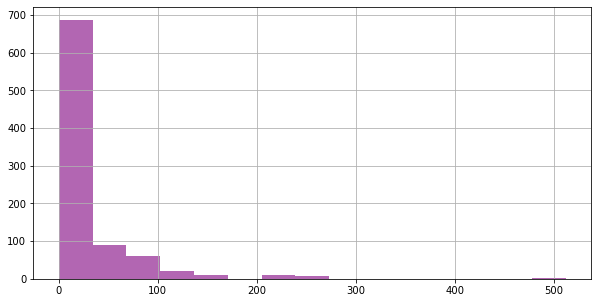

In [64]:
df['Fare'].hist(bins=15, color='purple', alpha=0.6, figsize=(10, 5))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

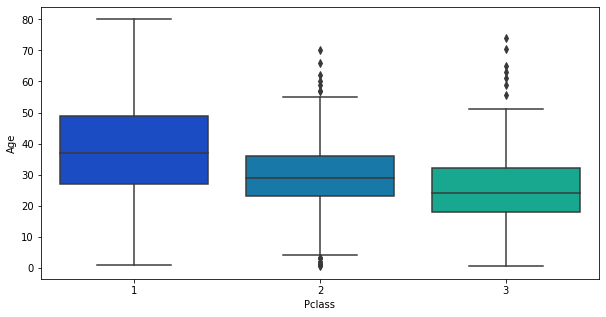

In [65]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

In [66]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 32
        elif Pclass == 2:
            return 26
        else:
            return 21
    else:
        return Age

In [67]:
df['Age']=df[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

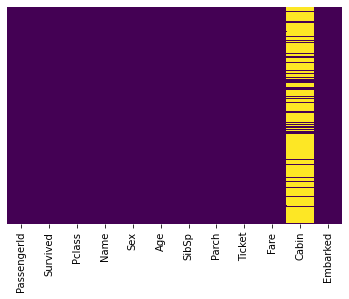

In [68]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [69]:
df.drop('Cabin', inplace=True, axis=1)

<AxesSubplot:>

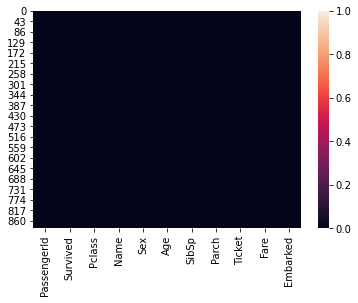

In [70]:
sns.heatmap(df.isnull())

In [71]:
df.shape

(891, 11)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [73]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.037237,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.039353,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.411647,0.083081,0.018443,-0.549500
Age,0.037237,-0.039353,-0.411647,1.000000,-0.241108,-0.155965,0.128578
SibSp,-0.057527,-0.035322,0.083081,-0.241108,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.155965,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.128578,0.159651,0.216225,1.000000


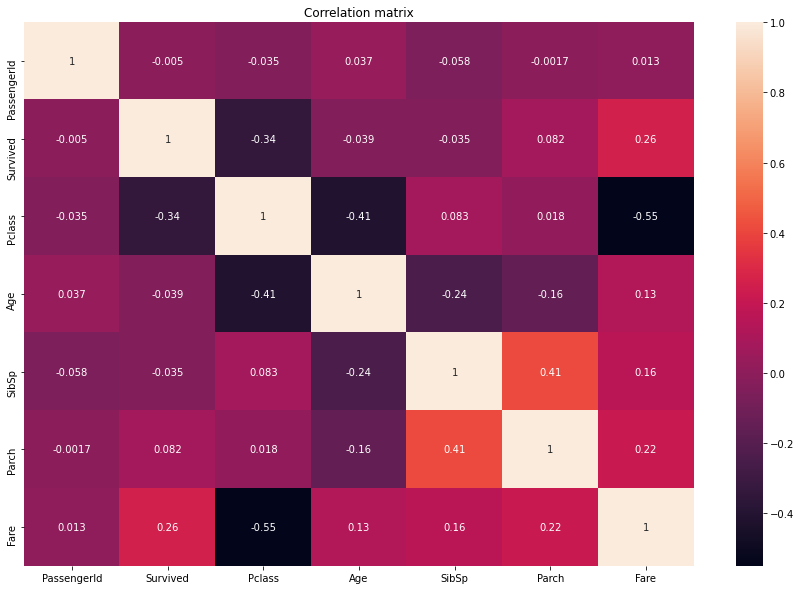

In [74]:
plt.figure(figsize=(15,10))
plt.title("Correlation matrix")
sns.heatmap(df.corr(), annot=True)
plt.show()

Converting into catagorical features

In [75]:
sex=pd.get_dummies(df['Sex'], drop_first=True)
embark=pd.get_dummies(df['Embarked'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [76]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [77]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [78]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,21.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [80]:
df=pd.concat([df, sex, embark], axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1,0,0,1
888,889,0,3,21.0,1,2,23.4500,0,0,1,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0,1,0,0


Building Logistic Regression Model

In [81]:
Y=df['Survived']

In [83]:
X=df.drop(['Survived'], axis=1)
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1,0,0,1
888,889,3,21.0,1,2,23.4500,0,0,1,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0,1,0,0


Split the data into two parts train and test

In [84]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=98)

Training and prediction

In [85]:
logReg=LogisticRegression()

In [86]:
logReg.fit(X_train, Y_train)

LogisticRegression()

In [87]:
predictions=logReg.predict(X_test)

Evaluation

In [88]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       161
           1       0.75      0.66      0.70       107

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



In [89]:
pred=logReg.predict(X)

In [90]:
pred.shape

(891,)

In [92]:
X.shape

(891, 12)

Saving Model

In [96]:
filename ="Titanic_Project.pkl"
pickle.dump(pred, open(filename, 'wb'))